In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customer_data = pd.read_csv(r'/content/customer_data_1000.csv')

In [ ]:
print("Dataset Info:")
print(customer_data.info())

print("\nDataset Description:")
print(customer_data.describe())

print("\nFirst Few Rows:")
print(customer_data.head())

# Check for non-numeric values in numeric columns
numeric_columns = customer_data.select_dtypes(include=['float64', 'int64']).columns
non_numeric_issues = {}

for column in numeric_columns:
    non_numeric_values = customer_data[column][~customer_data[column].apply(lambda x: isinstance(x, (int, float)))]
    if not non_numeric_values.empty:
        non_numeric_issues[column] = non_numeric_values.unique()

print("\nNon-numeric issues found in numeric columns:", non_numeric_issues)

# Convert columns to numeric, forcing errors to NaN
for column in numeric_columns:
    customer_data[column] = pd.to_numeric(customer_data[column], errors='coerce')

# Check for any remaining non-numeric values
remaining_non_numeric = customer_data[numeric_columns].isnull().sum()
print("\nRemaining non-numeric values after conversion (as NaN):")
print(remaining_non_numeric)



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          1000 non-null   int64 
 1   Age                 1000 non-null   int64 
 2   Gender              1000 non-null   object
 3   AnnualIncome        1000 non-null   int64 
 4   SpendingScore       1000 non-null   int64 
 5   PurchaseHistory     1000 non-null   int64 
 6   MembershipDuration  1000 non-null   int64 
 7   FeedbackScore       1000 non-null   int64 
 8   ChurnIndicator      1000 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 70.4+ KB
None

Dataset Description:
        CustomerID          Age   AnnualIncome  SpendingScore  \
count  1000.000000  1000.000000    1000.000000    1000.000000   
mean    500.500000    43.885000   74573.534000      50.330000   
std     288.819436    14.713064   25547.467517      29.056279   
min       1.000

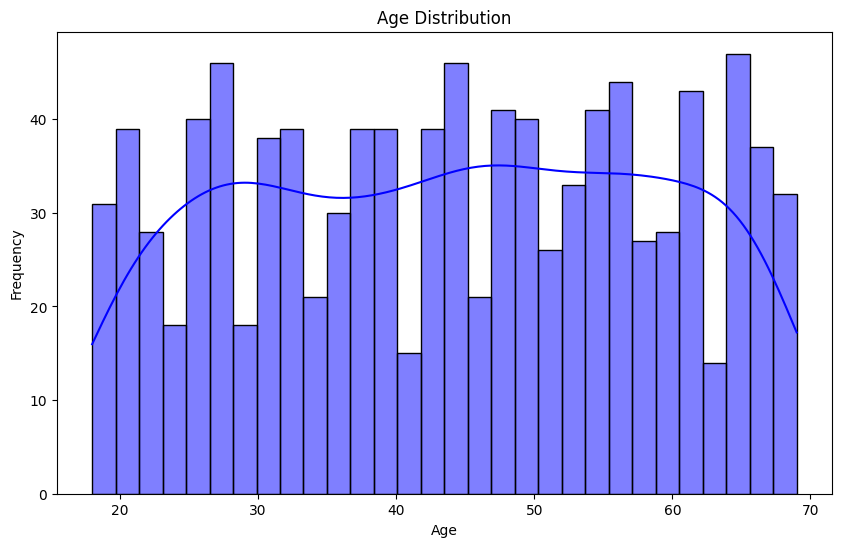

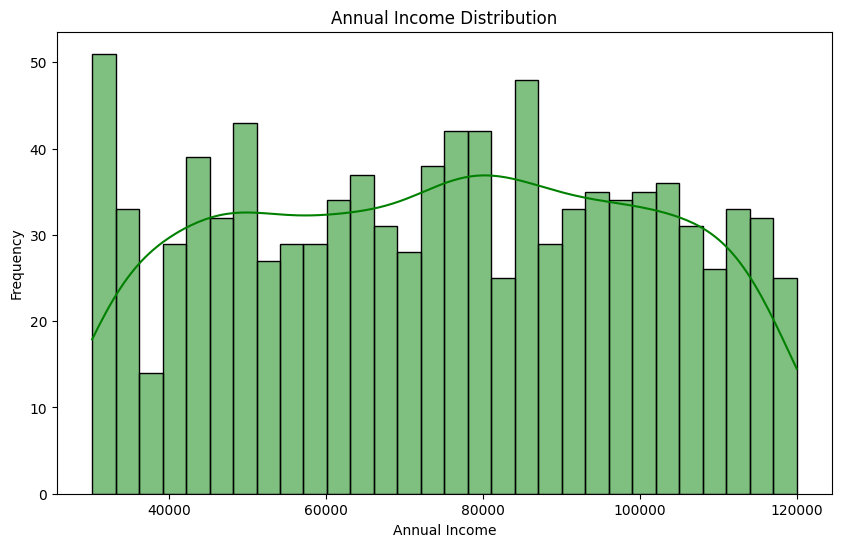

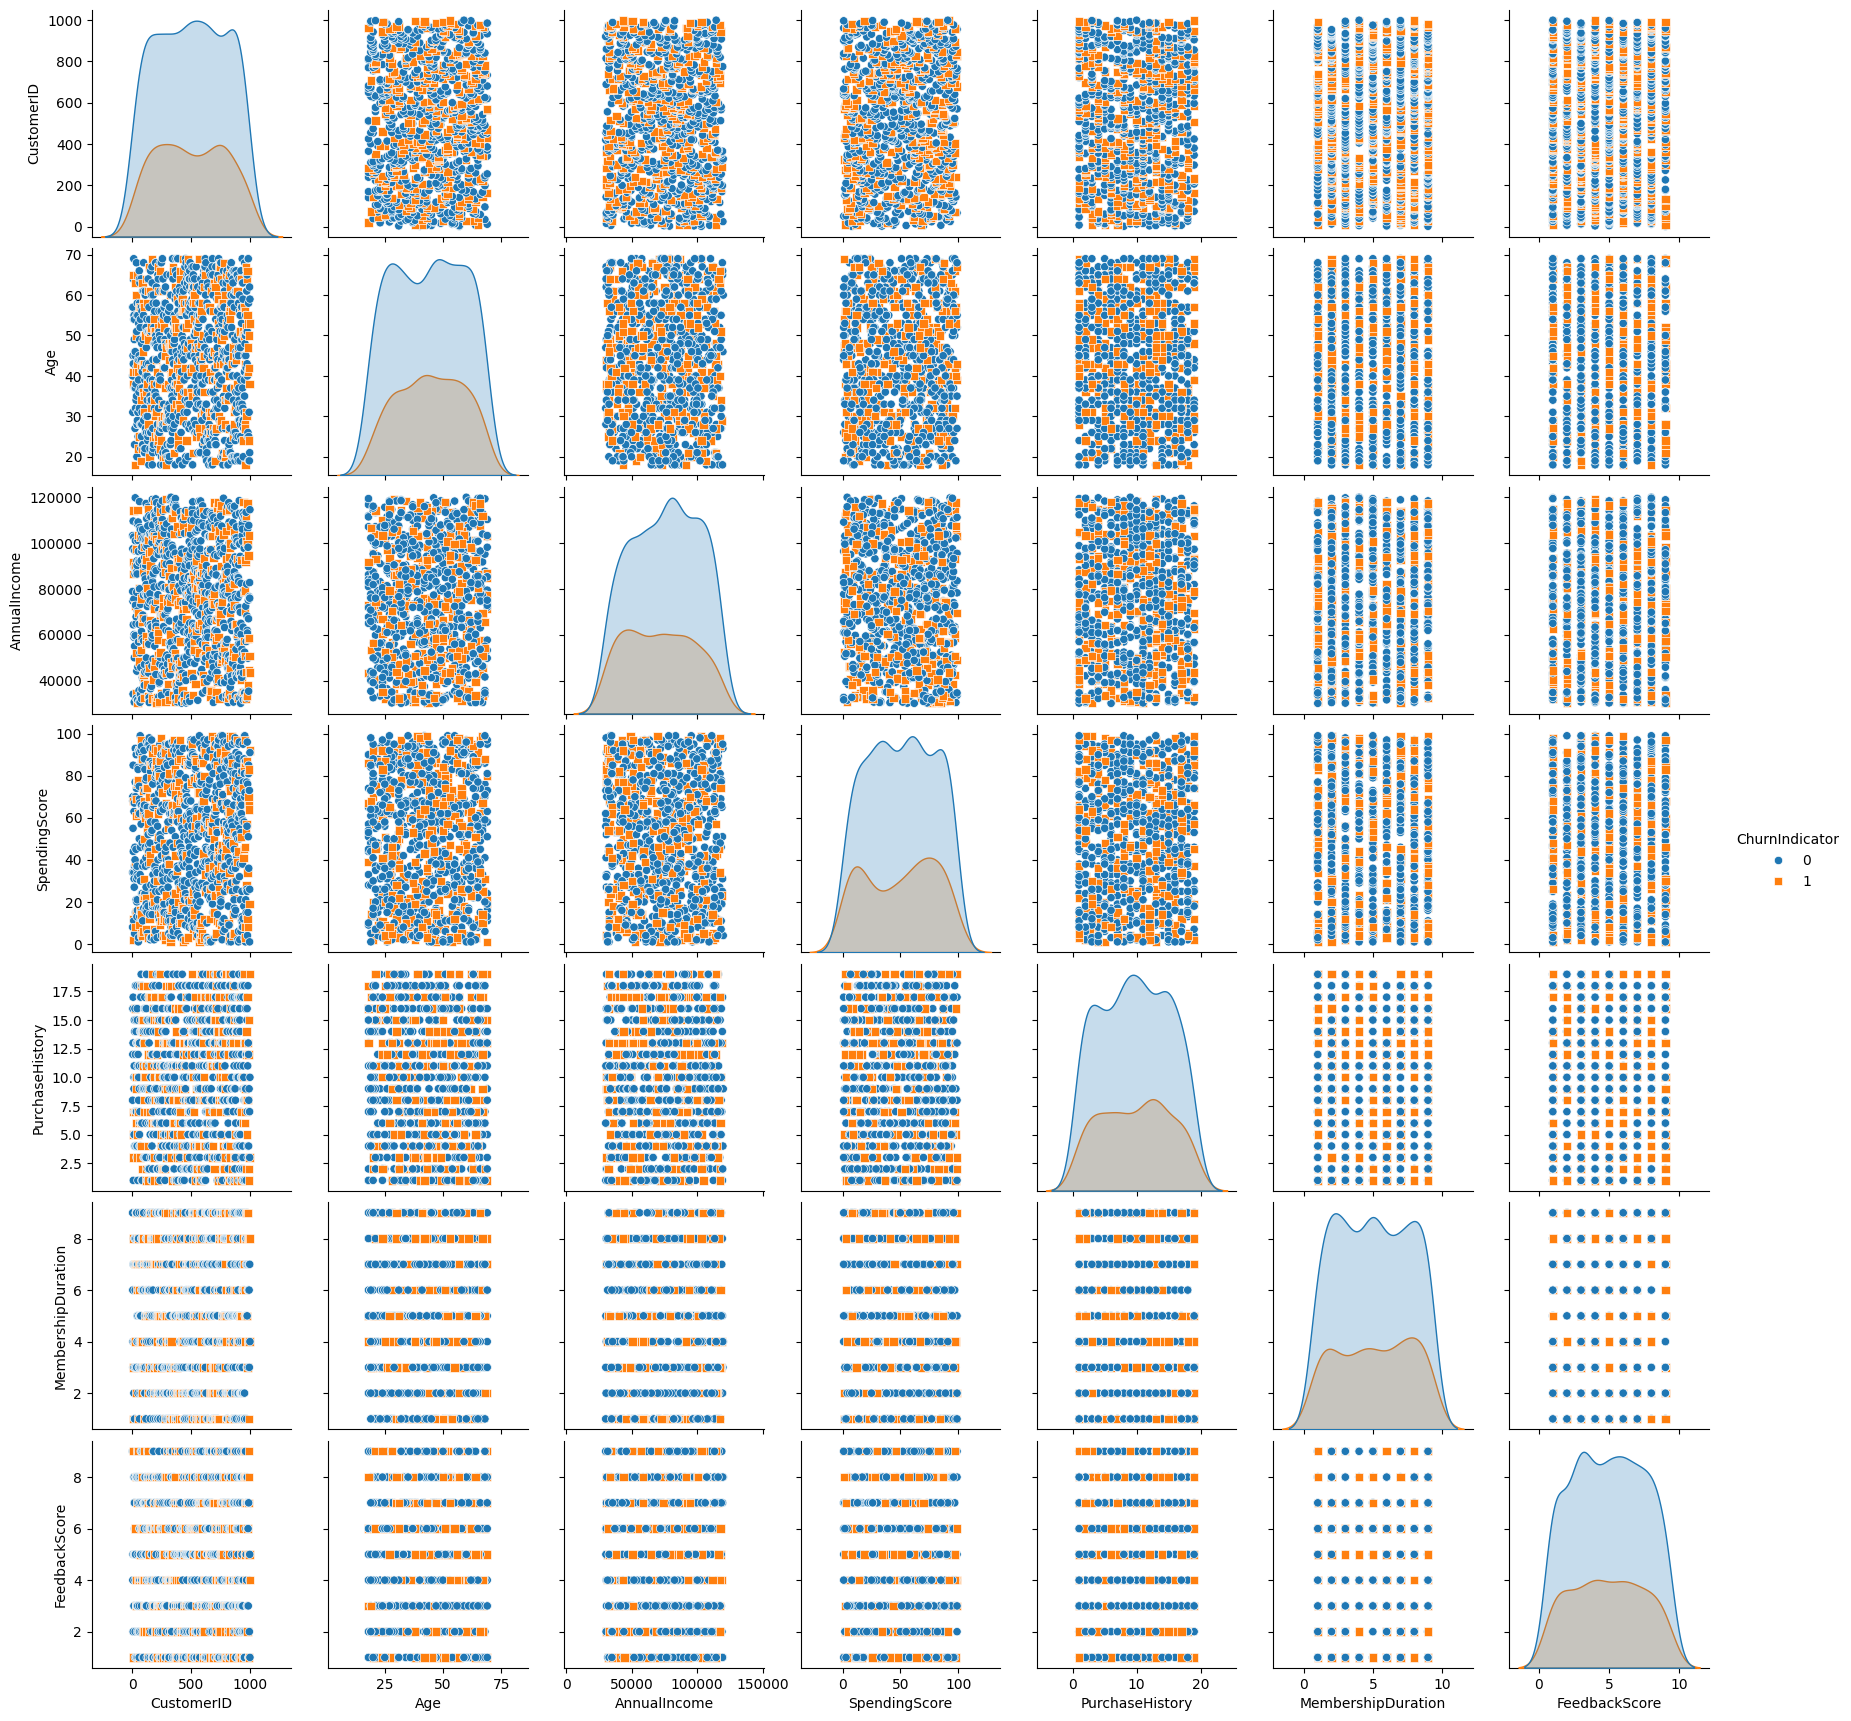

In [ ]:
# Plot the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['Age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of AnnualIncome
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['AnnualIncome'], kde=True, bins=30, color='green')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# Select only numeric columns for the pairplot (exclude any still with non-numeric issues)
numeric_columns_clean = customer_data.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(customer_data[numeric_columns_clean], hue='ChurnIndicator', diag_kind='kde', markers=["o", "s"])
plt.show()

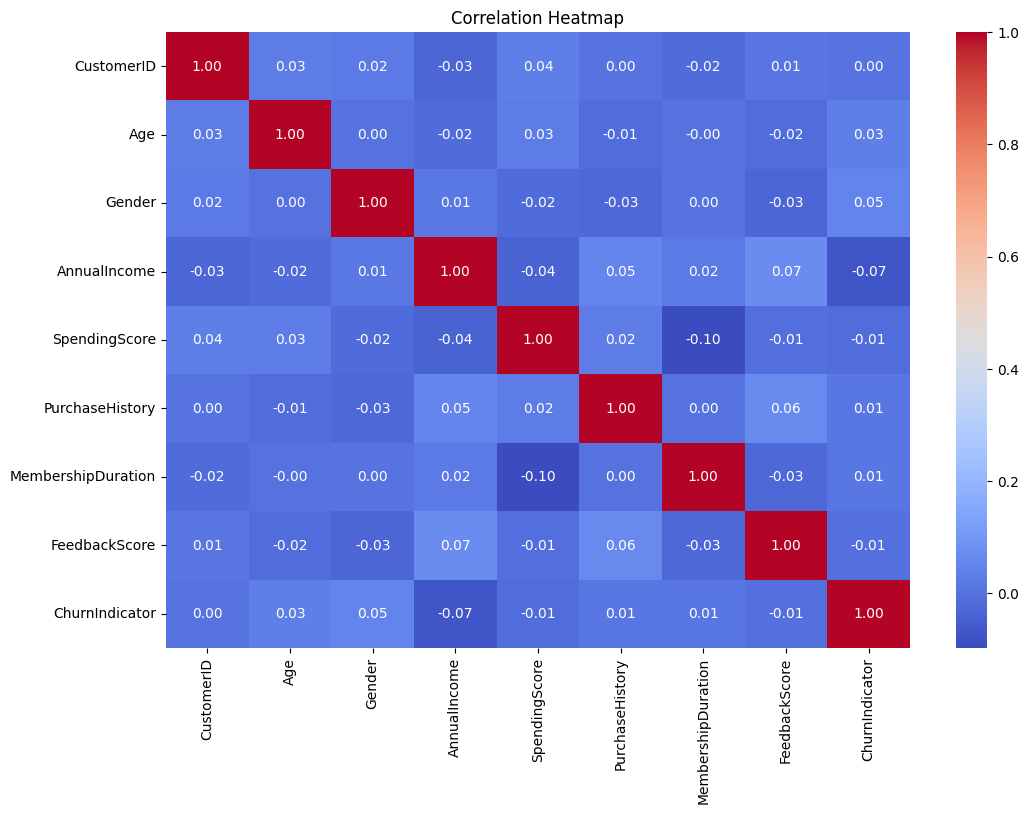

In [ ]:
# Convert 'Gender' column to numeric if present
if 'Gender' in customer_data.columns:
    customer_data['Gender'] = customer_data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Check again for non-numeric columns and ensure they are excluded
numeric_columns_clean = customer_data.select_dtypes(include=['float64', 'int64']).columns

# Correlation heatmap only for numeric columns
plt.figure(figsize=(12, 8))
correlation_matrix = customer_data[numeric_columns_clean].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


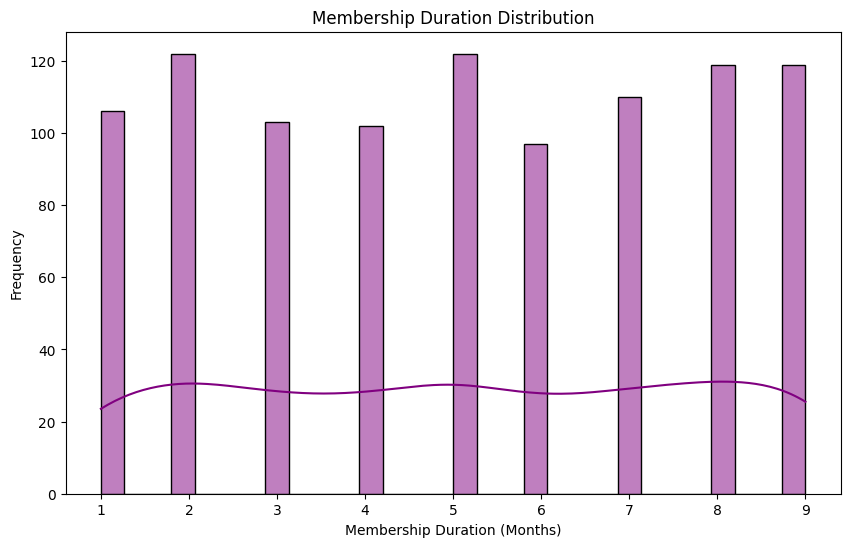

In [ ]:
# Plot the distribution of MembershipDuration
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['MembershipDuration'], kde=True, bins=30, color='purple')
plt.title('Membership Duration Distribution')
plt.xlabel('Membership Duration (Months)')
plt.ylabel('Frequency')
plt.show()


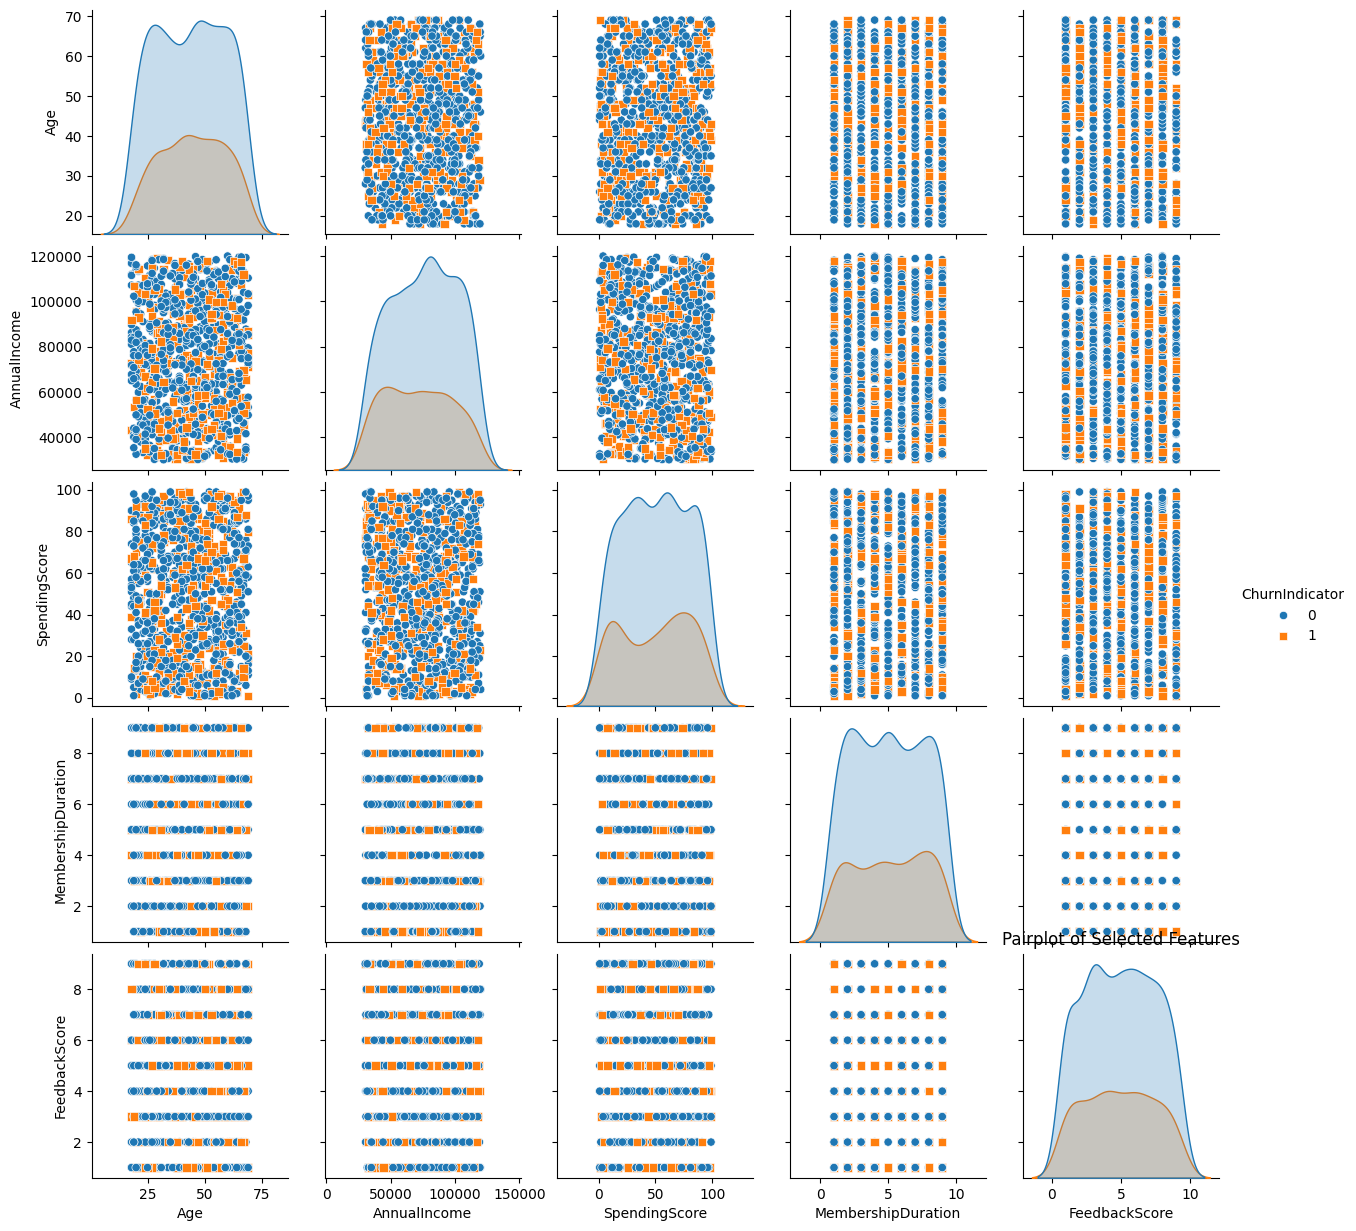

In [ ]:
# Updated pairplot with selected features
selected_features = ['Age', 'AnnualIncome', 'SpendingScore', 'MembershipDuration', 'FeedbackScore', 'ChurnIndicator']
sns.pairplot(customer_data[selected_features], hue='ChurnIndicator', diag_kind='kde', markers=["o", "s"])
plt.title('Pairplot of Selected Features')
plt.show()


In [ ]:
# Check the column names
print(customer_data.columns)
df = customer_data

Index(['CustomerID', 'Age', 'Gender', 'AnnualIncome', 'SpendingScore',
       'PurchaseHistory', 'MembershipDuration', 'FeedbackScore',
       'ChurnIndicator'],
      dtype='object')


In [ ]:
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler
# Interaction Terms
df['Age_Income_Interaction'] = df['Age'] * df['AnnualIncome']
df['Spend_Duration_Interaction'] = df['SpendingScore'] * df['MembershipDuration']
df['Age_Spend_Interaction'] = df['Age'] * df['SpendingScore']

# Polynomial Features
df['Age_squared'] = df['Age'] ** 2
df['SpendingScore_squared'] = df['SpendingScore'] ** 2

# Short Membership Indicator
df['ShortMembership'] = df['MembershipDuration'].apply(lambda x: 1 if x < 1 else 0)

# Membership Duration Categories
df['MembershipDurationCategory'] = pd.cut(df['MembershipDuration'], bins=[ 1, 3, 5, 9, float('inf')],
                                           labels=['Short', 'Medium', 'Long', 'Very Long'])

# Churn Risk by Duration
churn_rate_by_duration = df.groupby('MembershipDurationCategory')['ChurnIndicator'].mean()
df['ChurnRiskByDuration'] = df['MembershipDurationCategory'].map(churn_rate_by_duration)


# Now you can use StandardScaler as intended
scaler = StandardScaler()
# Standardize Continuous Features
scaler = StandardScaler()
df[['AnnualIncome', 'SpendingScore']] = scaler.fit_transform(df[['AnnualIncome', 'SpendingScore']])

# After applying these transformations, your dataset will capture the combined effects of multiple features on churn risk.


<ipython-input-5-04268e91353c>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_duration = df.groupby('MembershipDurationCategory')['ChurnIndicator'].mean()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Separate the categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns  # Columns with categorical data
numerical_columns = df.select_dtypes(exclude=['object']).columns  # Columns with numerical data

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
# Apply Label Encoding to the 'MembershipDurationCategory' column
df['MembershipDurationCategory'] = label_encoder.fit_transform(df['MembershipDurationCategory'])
# Now check the data to confirm Label Encoding
print(df.head())



   CustomerID  Age  Gender  AnnualIncome  SpendingScore  PurchaseHistory  \
0           1   57       1      1.121825      -1.457557                8   
1           2   40       1      0.170336      -0.562294               16   
2           3   31       0      0.899305       0.677301               12   
3           4   57       0      0.003739       0.608434               16   
4           5   45       1     -1.580498       0.160803               13   

   MembershipDuration  FeedbackScore  ChurnIndicator  Age_Income_Interaction  \
0                   9              9               0                 5883483   
1                   6              9               0                 3156920   
2                   6              4               0                 3023647   
3                   4              5               0                 4256133   
4                   3              2               0                 1539720   

   Spend_Duration_Interaction  Age_Spend_Interaction  Age_squa

In [ ]:
# Optionally, separate back into X and y for model training
X = df.drop(columns=['ChurnIndicator'])  # Features
y = df['ChurnIndicator']  # Target

In [ ]:
# Fill missing values for numerical columns with the mean
X = X.fillna(X.mean())  # For numerical columns, fill NaN with the mean

# Fill missing values for categorical columns with the mode (most frequent value)
X = X.apply(lambda col: col.fillna(col.mode()[0]) if col.dtype == 'object' else col, axis=0)

# Verify that no NaN values remain
print(X.isna().sum())  # Check if there are any missing values left


CustomerID                    0
Age                           0
Gender                        0
AnnualIncome                  0
SpendingScore                 0
PurchaseHistory               0
MembershipDuration            0
FeedbackScore                 0
Age_Income_Interaction        0
Spend_Duration_Interaction    0
Age_Spend_Interaction         0
Age_squared                   0
SpendingScore_squared         0
ShortMembership               0
MembershipDurationCategory    0
ChurnRiskByDuration           0
dtype: int64


In [ ]:
# Check the data types of all columns
print(X.dtypes)

# Convert categorical columns to numeric using LabelEncoder if needed
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

CustomerID                      int64
Age                             int64
Gender                          int64
AnnualIncome                  float64
SpendingScore                 float64
PurchaseHistory                 int64
MembershipDuration              int64
FeedbackScore                   int64
Age_Income_Interaction          int64
Spend_Duration_Interaction      int64
Age_Spend_Interaction           int64
Age_squared                     int64
SpendingScore_squared           int64
ShortMembership                 int64
MembershipDurationCategory      int64
ChurnRiskByDuration           float64
dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Split the dataset into training and test sets
X = df.drop(columns=['ChurnIndicator'])  # Features
y = df['ChurnIndicator']  # Target

# Check for NaNs before splitting
print(X.isnull().sum())  # Check if there are any missing values
print(y.isnull().sum())  # Check for missing target values

# Handle missing values using SimpleImputer (for both training and testing)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  # Fit on the whole dataset to ensure no NaNs

# Re-create the train-test split using the imputed data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Verify that the data has no missing values
print("Training Data missing values after imputation:", pd.DataFrame(X_train).isnull().sum().sum())
print("Test Data missing values after imputation:", pd.DataFrame(X_test).isnull().sum().sum())

# Define models to compare
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Accuracy score
    cm = confusion_matrix(y_test, y_pred)  # Confusion matrix

    print(f"{model_name} Accuracy: {accuracy}")
    print(f"Confusion Matrix for {model_name}:")
    print(cm)
    print("\n" + "-"*50 + "\n")


CustomerID            0
Age                   0
Gender                0
AnnualIncome          0
SpendingScore         0
PurchaseHistory       0
MembershipDuration    0
FeedbackScore         0
dtype: int64
0
Training Data missing values after imputation: 0
Test Data missing values after imputation: 0
Training Logistic Regression...
Logistic Regression Accuracy: 0.67
Confusion Matrix for Logistic Regression:
[[201   0]
 [ 99   0]]

--------------------------------------------------

Training SVM...
SVM Accuracy: 0.67
Confusion Matrix for SVM:
[[201   0]
 [ 99   0]]

--------------------------------------------------

Training KNN...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN Accuracy: 0.6166666666666667
Confusion Matrix for KNN:
[[176  25]
 [ 90   9]]

--------------------------------------------------

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.5933333333333334
Confusion Matrix for Gradient Boosting:
[[170  31]
 [ 91   8]]

--------------------------------------------------

Training XGBoost...
XGBoost Accuracy: 0.5866666666666667
Confusion Matrix for XGBoost:
[[165  36]
 [ 88  11]]

--------------------------------------------------



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:07:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score


In [ ]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print(f"Class distribution in the resampled training set: {y_train_resampled.value_counts()}")


Class distribution in the resampled training set: ChurnIndicator
0    506
1    506
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Create a GradientBoosting model
model = GradientBoostingClassifier()

# GridSearchCV to tune the model
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the resampled data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters found
print(f"Best parameters for Gradient Boosting: {grid_search.best_params_}")

# Access the best model
best_model = grid_search.best_estimator_


Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [ ]:
!pip uninstall -y xgboost
!pip uninstall -y scikit-learn
!pip install xgboost==1.6.1
!pip install scikit-learn==0.24.2


Found existing installation: xgboost 2.1.3
Uninstalling xgboost-2.1.3:
  Successfully uninstalled xgboost-2.1.3
Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Successfully uninstalled scikit-learn-1.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.9/192.9 MB 5.8 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 66.3 MB/s eta 0:00:00
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE  # For handling class imbalance
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Split the dataset into training and test sets
X = df.drop(columns=['ChurnIndicator'])  # Features
y = df['ChurnIndicator']  # Target

# Check for NaNs before splitting
print(X.isnull().sum())  # Check if there are any missing values
print(y.isnull().sum())  # Check for missing target values

# Handle missing values using SimpleImputer (for both training and testing)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  # Fit on the whole dataset to ensure no NaNs

# Re-create the train-test split using the imputed data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Define parameter grid for Gradient Boosting
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],  # Added to enhance model generalization
    'subsample': [0.8, 1.0]  # Added to prevent overfitting
}

# Perform Grid Search to tune Gradient Boosting hyperparameters
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Print best parameters
print(f"Best parameters for Gradient Boosting: {grid_search.best_params_}")

# Get the best model
best_gb_model = grid_search.best_estimator_

# Evaluate on the test data
y_pred = best_gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Final Gradient Boosting Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)


CustomerID                      0
Age                             0
Gender                          0
AnnualIncome                    0
SpendingScore                   0
PurchaseHistory                 0
MembershipDuration              0
FeedbackScore                   0
Age_Income_Interaction          0
Spend_Duration_Interaction      0
Age_Spend_Interaction           0
Age_squared                     0
SpendingScore_squared           0
ShortMembership                 0
MembershipDurationCategory      0
ChurnRiskByDuration           106
dtype: int64
0
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Final Gradient Boosting Accuracy: 0.6033333333333334
Confusion Matrix:
[[162  39]
 [ 80  19]]


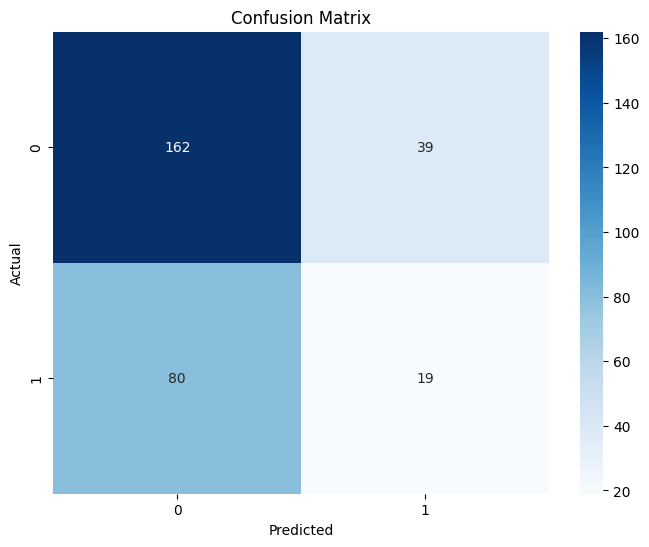

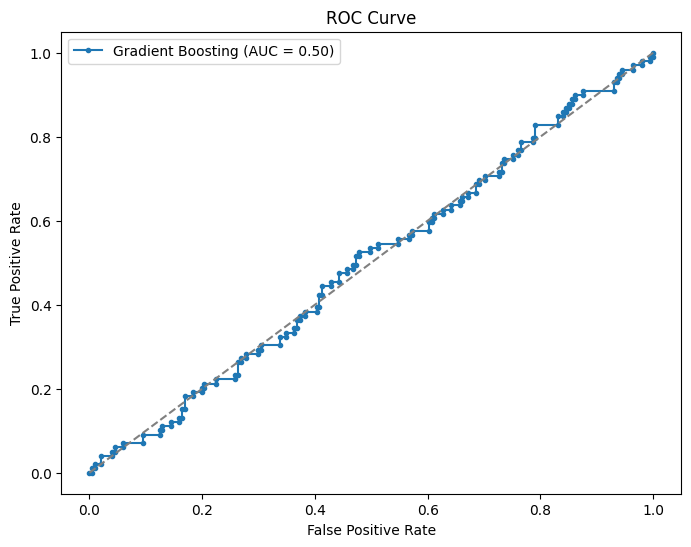

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import roc_curve

# Compute the predicted probabilities
y_pred_prob = best_gb_model.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='Gradient Boosting (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import numpy as np

# Define the model
gb = GradientBoostingClassifier()

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(gb, param_distributions=param_dist, n_iter=50, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
best_params = random_search.best_params_
print(f"Best parameters from RandomizedSearchCV: {best_params}")

# Train the model with best parameters
best_gb = random_search.best_estimator_
y_pred = best_gb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{cm}")

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, best_gb.predict_proba(X_test)[:, 1])
print(f"AUC-ROC: {roc_auc}")


Best parameters from RandomizedSearchCV: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 9, 'learning_rate': 0.2}
Accuracy: 0.6
Confusion Matrix: 
[[164  37]
 [ 83  16]]
AUC-ROC: 0.49977385798281315


In [ ]:
# Re-apply label encoding for any categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Verify the data types of the columns
print(X.dtypes)


CustomerID                      int64
Age                             int64
Gender                          int64
AnnualIncome                  float64
SpendingScore                 float64
PurchaseHistory                 int64
MembershipDuration              int64
FeedbackScore                   int64
Age_Income_Interaction          int64
Spend_Duration_Interaction      int64
Age_Spend_Interaction           int64
Age_squared                     int64
SpendingScore_squared           int64
ShortMembership                 int64
MembershipDurationCategory      int64
ChurnRiskByDuration           float64
dtype: object


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Define parameter grid for each model
xgb_params = {
    'n_estimators': 200,
    'learning_rate': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'random_state': 42,
    'eval_metric': 'logloss'
}



# Train and evaluate XGBoost
xgb_model = xgb.XGBClassifier(**xgb_params)
xgb_model.fit(X_train_resampled, y_train_resampled)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print(f"XGBoost - Accuracy: {xgb_accuracy}, AUC-ROC: {xgb_roc_auc}")
print(f"XGBoost Confusion Matrix:\n{confusion_matrix(y_test, xgb_pred)}\n")




XGBoost - Accuracy: 0.6033333333333334, AUC-ROC: 0.500376903361978
XGBoost Confusion Matrix:
[[160  41]
 [ 78  21]]



In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Define parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Perform RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_grid,
                                      n_iter=50, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)
rf_random_search.fit(X_train_resampled, y_train_resampled)
best_rf = rf_random_search.best_estimator_
print("Best parameters for Random Forest:", rf_random_search.best_params_)

# Perform RandomizedSearchCV for Gradient Boosting
gb_random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=gb_param_grid,
                                      n_iter=50, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)
gb_random_search.fit(X_train_resampled, y_train_resampled)
best_gb = gb_random_search.best_estimator_
print("Best parameters for Gradient Boosting:", gb_random_search.best_params_)

# Evaluate Random Forest
y_pred_rf = best_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Confusion Matrix:", conf_matrix_rf)
print(f"Random Forest AUC-ROC: {roc_auc_rf}")

# Evaluate Gradient Boosting
y_pred_gb = best_gb.predict(X_test_scaled)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)

print(f"Gradient Boosting Accuracy: {accuracy_gb}")
print("Gradient Boosting Confusion Matrix:", conf_matrix_gb)
print(f"Gradient Boosting AUC-ROC: {roc_auc_gb}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Gradient Boosting: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 9, 'learning_rate': 0.2}
Random Forest Accuracy: 0.62
Random Forest Confusion Matrix: [[112  29]
 [ 47  12]]
Random Forest AUC-ROC: 0.4988580358216132
Gradient Boosting Accuracy: 0.645
Gradient Boosting Confusion Matrix: [[120  21]
 [ 50   9]]
Gradient Boosting AUC-ROC: 0.5018031013342951


In [ ]:
# Random Forest with class_weight='balanced'
rf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42, class_weight='balanced')
rf.fit(X_train_resampled, y_train_resampled)

# Gradient Boosting with class_weight='balanced'
gb = GradientBoostingClassifier(n_estimators=200, max_depth=9, learning_rate=0.2, subsample=0.8)
gb.fit(X_train_resampled, y_train_resampled)

# Evaluate the models
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Gradient Boosting Accuracy: {gb_accuracy}")


Random Forest Accuracy: 0.68
Gradient Boosting Accuracy: 0.655


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Define SVM with class weights
svm = SVC(kernel='linear', class_weight='balanced', random_state=42)

# Fit the model
svm.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_svm = svm.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm}")
print("SVM Confusion Matrix:", conf_matrix_svm)
print(f"SVM AUC-ROC: {roc_auc_svm}")


SVM Accuracy: 0.52
SVM Confusion Matrix: [[70 71]
 [25 34]]
SVM AUC-ROC: 0.536362543574949


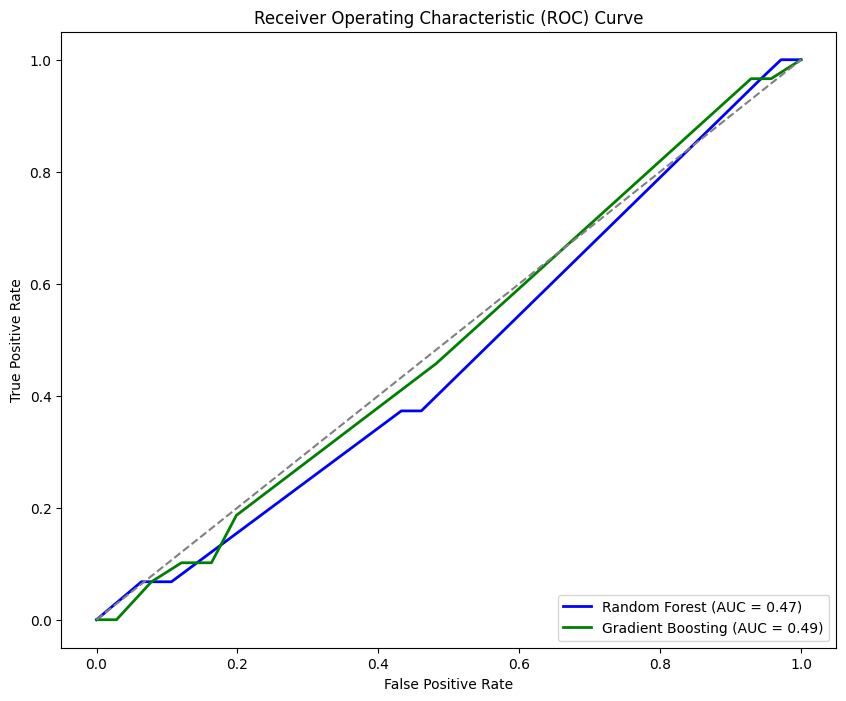

Random Forest AUC-ROC: 0.47
Gradient Boosting AUC-ROC: 0.49


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for both models
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]  # For Random Forest
y_prob_gb = best_gb.predict_proba(X_test)[:, 1]  # For Gradient Boosting

# Compute AUC-ROC for Random Forest
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Compute AUC-ROC for Gradient Boosting
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)

# Plot AUC-ROC curves
plt.figure(figsize=(10, 8))

# Plot Random Forest ROC curve
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Plot Gradient Boosting ROC curve
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labels and title
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.show()

# Print the AUC scores
print(f"Random Forest AUC-ROC: {roc_auc_rf:.2f}")
print(f"Gradient Boosting AUC-ROC: {roc_auc_gb:.2f}")


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Define the classifiers
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
gb = GradientBoostingClassifier(random_state=42)
svm = SVC(class_weight='balanced', random_state=42)
xg = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
lgbm = lgb.LGBMClassifier(class_weight='balanced', random_state=42)

# Define hyperparameters for RandomizedSearchCV
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# SMOTE + ENN pipeline
smote_enn = imPipeline(steps=[('smote', SMOTE(random_state=42)), ('enn', EditedNearestNeighbours())])

# Use RandomizedSearchCV to find the best model parameters
rf_random_search = RandomizedSearchCV(rf, rf_param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
gb_random_search = RandomizedSearchCV(gb, gb_param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the models on resampled data
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Random Forest tuning and fitting
rf_random_search.fit(X_train_resampled, y_train_resampled)
best_rf_model = rf_random_search.best_estimator_

# Gradient Boosting tuning and fitting
gb_random_search.fit(X_train_resampled, y_train_resampled)
best_gb_model = gb_random_search.best_estimator_

# Evaluate Random Forest
y_pred_rf = best_rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest AUC-ROC:", roc_auc_score(y_test, y_pred_rf))

# Evaluate Gradient Boosting
y_pred_gb = best_gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Gradient Boosting AUC-ROC:", roc_auc_score(y_test, y_pred_gb))

# Stacking Classifier (Random Forest and Gradient Boosting)
stacking_clf = StackingClassifier(estimators=[('rf', best_rf_model), ('gb', best_gb_model)], final_estimator=LogisticRegression())
stacking_clf.fit(X_train_resampled, y_train_resampled)
y_pred_stack = stacking_clf.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Stacking Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print("Stacking Classifier AUC-ROC:", roc_auc_score(y_test, y_pred_stack))


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Random Forest Accuracy: 0.73
Random Forest Confusion Matrix:
 [[141   0]
 [ 54   5]]
Random Forest AUC-ROC: 0.5423728813559322
Gradient Boosting Accuracy: 0.705
Gradient Boosting Confusion Matrix:
 [[138   3]
 [ 56   3]]
Gradient Boosting AUC-ROC: 0.5147854309412189
Stacking Classifier Accuracy: 0.705
Stacking Classifier Confusion Matrix:
 [[137   4]
 [ 55   4]]
Stacking Classifier AUC-ROC: 0.5197139079216252


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer

# Define the Random Forest classifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define hyperparameters for RandomizedSearchCV
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# SMOTE + ENN pipeline
smote_enn = imPipeline(steps=[('smote', SMOTE(random_state=42)), ('enn', EditedNearestNeighbours())])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values using SimpleImputer (you can choose strategy='mean', 'median', or 'most_frequent')
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Resample the data using SMOTE + ENN
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_imputed, y_train)

# Random Forest tuning and fitting using RandomizedSearchCV
rf_random_search = RandomizedSearchCV(rf, rf_param_grid, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
rf_random_search.fit(X_train_resampled, y_train_resampled)

# Get the best model from RandomizedSearchCV
best_rf_model = rf_random_search.best_estimator_

# Evaluate the Random Forest model
y_pred_rf = best_rf_model.predict(X_test_imputed)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest AUC-ROC:", roc_auc_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.685
Random Forest Confusion Matrix:
 [[136   4]
 [ 59   1]]
Random Forest AUC-ROC: 0.494047619047619


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Define classifiers for stacking
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Define hyperparameters for RandomizedSearchCV
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# SMOTE + ENN pipeline
smote_enn = imPipeline(steps=[('smote', SMOTE(random_state=42)), ('enn', EditedNearestNeighbours())])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Imputing missing values with mean
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Resample the data using SMOTE + ENN
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_imputed, y_train)

# Random Forest tuning and fitting using RandomizedSearchCV
rf_random_search = RandomizedSearchCV(rf, rf_param_grid, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
rf_random_search.fit(X_train_resampled, y_train_resampled)
best_rf_model = rf_random_search.best_estimator_

# Gradient Boosting tuning and fitting using RandomizedSearchCV
gb_random_search = RandomizedSearchCV(gb, gb_param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
gb_random_search.fit(X_train_resampled, y_train_resampled)
best_gb_model = gb_random_search.best_estimator_

# Stacking Classifier (Random Forest and Gradient Boosting)
stacking_clf = StackingClassifier(estimators=[('rf', best_rf_model), ('gb', best_gb_model)], final_estimator=LogisticRegression())
stacking_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate the Stacked model
y_pred_stack = stacking_clf.predict(X_test_imputed)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Stacking Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print("Stacking Classifier AUC-ROC:", roc_auc_score(y_test, y_pred_stack))


Stacking Classifier Accuracy: 0.655
Stacking Classifier Confusion Matrix:
 [[130  10]
 [ 59   1]]
Stacking Classifier AUC-ROC: 0.4726190476190476


In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score

# Calculate Recall, Precision, and F1-score for Stacking Classifier
recall_stack = recall_score(y_test, y_pred_stack)
precision_stack = precision_score(y_test, y_pred_stack)
f1_stack = f1_score(y_test, y_pred_stack)

# Display results
print("Stacking Classifier Recall:", recall_stack)
print("Stacking Classifier Precision:", precision_stack)
print("Stacking Classifier F1-Score:", f1_stack)


Stacking Classifier Recall: 0.016666666666666666
Stacking Classifier Precision: 0.09090909090909091
Stacking Classifier F1-Score: 0.028169014084507043


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.impute import SimpleImputer

# Impute missing values with the median (or use other strategies like mean or most_frequent)
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Define the classifier with 'balanced' class weights (automatic)
rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define custom class weights (manual)
rf_custom = RandomForestClassifier(class_weight={0: 1, 1: 5}, random_state=42)  # Example custom weights

# Define hyperparameters for RandomizedSearchCV
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# SMOTE + ENN pipeline
smote_enn = imPipeline(steps=[('smote', SMOTE(random_state=42)), ('enn', EditedNearestNeighbours())])

# Train-test split (Assuming X_train and y_train are already defined)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Random Forest tuning and fitting with balanced weights
rf_random_search_balanced = RandomizedSearchCV(rf_balanced, rf_param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
rf_random_search_balanced.fit(X_train_resampled, y_train_resampled)
best_rf_balanced_model = rf_random_search_balanced.best_estimator_

# Random Forest tuning and fitting with custom weights
rf_random_search_custom = RandomizedSearchCV(rf_custom, rf_param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
rf_random_search_custom.fit(X_train_resampled, y_train_resampled)
best_rf_custom_model = rf_random_search_custom.best_estimator_

# Evaluate Random Forest with balanced weights
y_pred_rf_balanced = best_rf_balanced_model.predict(X_test)
print("Random Forest with Balanced Weights Accuracy:", accuracy_score(y_test, y_pred_rf_balanced))
print("Random Forest with Balanced Weights Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_balanced))
print("Random Forest with Balanced Weights AUC-ROC:", roc_auc_score(y_test, y_pred_rf_balanced))
print("Random Forest with Balanced Weights Recall:", recall_score(y_test, y_pred_rf_balanced))
print("Random Forest with Balanced Weights Precision:", precision_score(y_test, y_pred_rf_balanced))
print("Random Forest with Balanced Weights F1-Score:", f1_score(y_test, y_pred_rf_balanced))

# Evaluate Random Forest with custom weights
y_pred_rf_custom = best_rf_custom_model.predict(X_test)
print("Random Forest with Custom Weights Accuracy:", accuracy_score(y_test, y_pred_rf_custom))
print("Random Forest with Custom Weights Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_custom))
print("Random Forest with Custom Weights AUC-ROC:", roc_auc_score(y_test, y_pred_rf_custom))
print("Random Forest with Custom Weights Recall:", recall_score(y_test, y_pred_rf_custom))
print("Random Forest with Custom Weights Precision:", precision_score(y_test, y_pred_rf_custom))
print("Random Forest with Custom Weights F1-Score:", f1_score(y_test, y_pred_rf_custom))


Random Forest with Balanced Weights Accuracy: 0.685
Random Forest with Balanced Weights Confusion Matrix:
 [[137   3]
 [ 60   0]]
Random Forest with Balanced Weights AUC-ROC: 0.48928571428571427
Random Forest with Balanced Weights Recall: 0.0
Random Forest with Balanced Weights Precision: 0.0
Random Forest with Balanced Weights F1-Score: 0.0
Random Forest with Custom Weights Accuracy: 0.685
Random Forest with Custom Weights Confusion Matrix:
 [[137   3]
 [ 60   0]]
Random Forest with Custom Weights AUC-ROC: 0.48928571428571427
Random Forest with Custom Weights Recall: 0.0
Random Forest with Custom Weights Precision: 0.0
Random Forest with Custom Weights F1-Score: 0.0


In [ ]:
y_train.value_counts()

,count
ChurnIndicator,
0,567
1,233


In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_recall_curve, auc
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as imPipeline



# Handle missing data (if any)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Resample using SMOTE (to handle class imbalance)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define classifiers
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Define hyperparameters for RandomizedSearchCV
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomizedSearchCV for hyperparameter tuning
rf_random_search = RandomizedSearchCV(rf, rf_param_grid, n_iter=10, cv=5, n_jobs=-1, random_state=42)
gb_random_search = RandomizedSearchCV(gb, gb_param_grid, n_iter=10, cv=5, n_jobs=-1, random_state=42)

# Fit Random Forest and Gradient Boosting
rf_random_search.fit(X_train_resampled, y_train_resampled)
best_rf_model = rf_random_search.best_estimator_

gb_random_search.fit(X_train_resampled, y_train_resampled)
best_gb_model = gb_random_search.best_estimator_

# Evaluate Random Forest
y_pred_rf = best_rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest AUC-ROC:", roc_auc_score(y_test, y_pred_rf))

# Evaluate Gradient Boosting
y_pred_gb = best_gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Gradient Boosting AUC-ROC:", roc_auc_score(y_test, y_pred_gb))

# Stacking Classifier (Random Forest and Gradient Boosting)
stacking_clf = StackingClassifier(estimators=[
    ('rf', best_rf_model),
    ('gb', best_gb_model)
], final_estimator=LogisticRegression())

stacking_clf.fit(X_train_resampled, y_train_resampled)
y_pred_stack = stacking_clf.predict(X_test)

# Stacking Classifier Evaluation
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Stacking Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print("Stacking Classifier AUC-ROC:", roc_auc_score(y_test, y_pred_stack))

# Precision-Recall Curve and AUC for Stacking Classifier
precision, recall, _ = precision_recall_curve(y_test, stacking_clf.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)
print(f"Stacking Classifier Precision-Recall AUC: {pr_auc}")

# Additional evaluation metrics (Recall, Precision, F1-score)
from sklearn.metrics import recall_score, precision_score, f1_score

print("Stacking Classifier Recall:", recall_score(y_test, y_pred_stack))
print("Stacking Classifier Precision:", precision_score(y_test, y_pred_stack))
print("Stacking Classifier F1-Score:", f1_score(y_test, y_pred_stack))

# Custom Class Weights for Random Forest (optional)
rf_custom = RandomForestClassifier(class_weight={0: 1, 1: 5}, random_state=42)
rf_custom.fit(X_train_resampled, y_train_resampled)
y_pred_rf_custom = rf_custom.predict(X_test)

print("Random Forest with Custom Weights Accuracy:", accuracy_score(y_test, y_pred_rf_custom))
print("Random Forest with Custom Weights Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_custom))
print("Random Forest with Custom Weights AUC-ROC:", roc_auc_score(y_test, y_pred_rf_custom))

# Precision-Recall AUC for Random Forest with Custom Weights
precision, recall, _ = precision_recall_curve(y_test, rf_custom.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)
print(f"Random Forest with Custom Weights Precision-Recall AUC: {pr_auc}")


Random Forest Accuracy: 0.67
Random Forest Confusion Matrix:
 [[123  17]
 [ 49  11]]
Random Forest AUC-ROC: 0.530952380952381
Gradient Boosting Accuracy: 0.64
Gradient Boosting Confusion Matrix:
 [[113  27]
 [ 45  15]]
Gradient Boosting AUC-ROC: 0.5285714285714286
Stacking Classifier Accuracy: 0.665
Stacking Classifier Confusion Matrix:
 [[116  24]
 [ 43  17]]
Stacking Classifier AUC-ROC: 0.5559523809523809
Stacking Classifier Precision-Recall AUC: 0.35609243675307745
Stacking Classifier Recall: 0.2833333333333333
Stacking Classifier Precision: 0.4146341463414634
Stacking Classifier F1-Score: 0.33663366336633666
Random Forest with Custom Weights Accuracy: 0.66
Random Forest with Custom Weights Confusion Matrix:
 [[122  18]
 [ 50  10]]
Random Forest with Custom Weights AUC-ROC: 0.5190476190476191
Random Forest with Custom Weights Precision-Recall AUC: 0.346926728912755


In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
from imblearn.pipeline import Pipeline

# SMOTE for resampling
smote = SMOTE(random_state=42)

# Create CatBoostClassifier instance
catboost = CatBoostClassifier(random_state=42, cat_features=[], silent=True)  # 'silent=True' suppresses verbose output

# Hyperparameter grid for RandomizedSearchCV
param_grid = {
    'catboost__iterations': [100, 200, 300],
    'catboost__depth': [5, 6, 7],
    'catboost__learning_rate': [0.01, 0.1, 0.3],
    'catboost__l2_leaf_reg': [1, 3, 5]
}

# Setup the pipeline with SMOTE and CatBoostClassifier
pipeline = Pipeline([
    ('smote', smote),
    ('catboost', catboost)
])

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, scoring='roc_auc', cv=5, n_jobs=-1, random_state=42)

# Resample data using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fit the model
random_search.fit(X_train_resampled, y_train_resampled)

# Best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

print("CatBoost Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC:", roc_auc)
print("Precision-Recall AUC:", pr_auc)

# Calculate additional metrics like Recall, Precision, F1-Score
from sklearn.metrics import recall_score, precision_score, f1_score
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.0 MB/s eta 0:00:00
CatBoost Accuracy: 0.645
Confusion Matrix:
 [[116  24]
 [ 47  13]]
ROC AUC: 0.5226190476190476
Precision-Recall AUC: 0.401509009009009
Recall: 0.21666666666666667
Precision: 0.35135135135135137
F1-Score: 0.26804123711340205


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier

# Step 1: Apply SMOTE (if using resampling technique)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 2: Model with balanced class weights (for CatBoost)
catboost_model = CatBoostClassifier(class_weights=[1, 5], random_state=42, iterations=500, learning_rate=0.1)

# Step 3: Fit the model
catboost_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Predict on the test set
y_pred = catboost_model.predict(X_test)

# Step 5: Evaluate the model
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))
print("Precision-Recall AUC:", roc_auc_score(y_test, y_pred, average='macro', sample_weight=None))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


0:	learn: 0.6341524	total: 11.8ms	remaining: 5.9s
1:	learn: 0.5904237	total: 23.3ms	remaining: 5.8s
2:	learn: 0.5548094	total: 44.2ms	remaining: 7.32s
3:	learn: 0.5243019	total: 57.5ms	remaining: 7.13s
4:	learn: 0.4990164	total: 68ms	remaining: 6.73s
5:	learn: 0.4730406	total: 77.9ms	remaining: 6.41s
6:	learn: 0.4591273	total: 90.8ms	remaining: 6.39s
7:	learn: 0.4380735	total: 108ms	remaining: 6.67s
8:	learn: 0.4282300	total: 118ms	remaining: 6.43s
9:	learn: 0.4188466	total: 128ms	remaining: 6.26s
10:	learn: 0.4113945	total: 141ms	remaining: 6.26s
11:	learn: 0.4053454	total: 155ms	remaining: 6.29s
12:	learn: 0.3995351	total: 166ms	remaining: 6.21s
13:	learn: 0.3936114	total: 178ms	remaining: 6.18s
14:	learn: 0.3892003	total: 189ms	remaining: 6.11s
15:	learn: 0.3799449	total: 199ms	remaining: 6s
16:	learn: 0.3771312	total: 209ms	remaining: 5.95s
17:	learn: 0.3731846	total: 219ms	remaining: 5.86s
18:	learn: 0.3677482	total: 234ms	remaining: 5.93s
19:	learn: 0.3632390	total: 245ms	remaini

In [ ]:
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

# Load your dataset and split into X (features) and y (target)
# X, y = your_data.drop('target', axis=1), your_data['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values by imputing with median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

# Define LightGBM model with class weights
lgbm_model = lgb.LGBMClassifier(
    class_weight='balanced',  # Automatically balances the class weights
    random_state=42,
    n_jobs=-1
)

# Train the model
lgbm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = lgbm_model.predict(X_test_imputed)

# Evaluate model performance
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optional: Tune hyperparameters using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 6, 10],
    'class_weight': ['balanced', None]  # You can try different class weighting strategies
}

random_search = RandomizedSearchCV(
    lgbm_model, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42
)

random_search.fit(X_train_resampled, y_train_resampled)

# Best model after RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test_imputed)

# Evaluate the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Best Model ROC AUC:", roc_auc_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 567, number of negative: 567
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3264
[LightGBM] [Info] Number of data points in the train set: 1134, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LightGBM Accuracy: 0.61
Confusion Matrix:
 [[108  32]
 [ 46  14]]
ROC AUC: 0.5023809523809524
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73       140
           1       0.30      0.23      0.26        60

    accuracy                           0.61       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.58      0.61      0.59       200



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 567, number of negative: 567
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3264
[LightGBM] [Info] Number of data points in the train set: 1134, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
import pandas as pd

# Load your dataset (assuming it's already loaded into X and y)
# X, y = your_data.drop('target', axis=1), your_data['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values by imputing with median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

# Convert to DataFrame to check for NaN values
X_train_resampled_df = pd.DataFrame(X_train_resampled)

# Check for NaN values
print(f"NaN values in features:\n{X_train_resampled_df.isna().sum()}")

# Define LightGBM model with class weights
lgbm_model = lgb.LGBMClassifier(
    class_weight='balanced',  # Automatically balances the class weights
    random_state=42,
    n_jobs=-1
)

# Train the model
lgbm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = lgbm_model.predict(X_test_imputed)

# Evaluate model performance
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optional: Tune hyperparameters using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 6, 10],
    'class_weight': ['balanced', None]  # You can try different class weighting strategies
}

random_search = RandomizedSearchCV(
    lgbm_model, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42
)

random_search.fit(X_train_resampled, y_train_resampled)

# Best model after RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test_imputed)

# Evaluate the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Best Model ROC AUC:", roc_auc_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))


NaN values in features:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64
[LightGBM] [Info] Number of positive: 567, number of negative: 567
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000653 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3264
[LightGBM] [Info] Number of data points in the train set: 1134, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LightGBM Accuracy: 0.61
Confusion Matrix:
 [[108  32]
 [ 46  14]]
ROC AUC: 0.5023809523809524
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73       140
           1       0.30      0.23      0.26        60

    accuracy                           0.61       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.58      0.61      0.59       200



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 567, number of negative: 567
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3264
[LightGBM] [Info] Number of data points in the train set: 1134, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_imputed)

# Define the neural network model
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train_resampled, epochs=20, batch_size=32, verbose=1)

# Make predictions
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate model performance
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4746 - loss: 0.7117
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5653 - loss: 0.6814
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5965 - loss: 0.6672
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6116 - loss: 0.6602
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6365 - loss: 0.6451
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6403 - loss: 0.6414
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6464 - loss: 0.6408
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6862 - loss: 0.6188
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6830 - loss: 0.6140
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6725 - loss: 0.6065
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6880 - loss: 0.6074
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6927 - lo